In [1]:
# torch import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import sys
import os
import argparse
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.dirname("__file__"), ".."))

from mnist.models.mnist_net import mnistNet
from fgsm_attack import FGSMAttack

Epsilon: 0.1	Attack Success Rate = 1 / 100 = 0.01
Epsilon: 0.15	Attack Success Rate = 5 / 100 = 0.05
Epsilon: 0.2	Attack Success Rate = 7 / 100 = 0.07
Epsilon: 0.25	Attack Success Rate = 14 / 100 = 0.14
Epsilon: 0.3	Attack Success Rate = 15 / 100 = 0.15


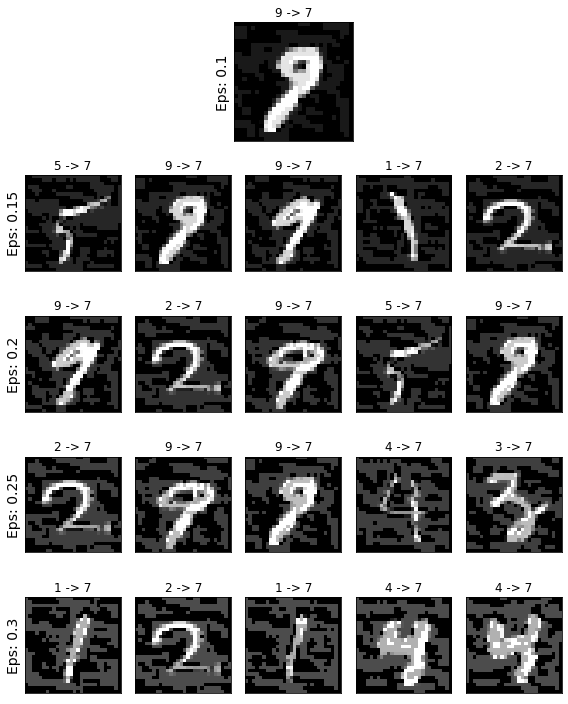

In [3]:
epsilons = [0.1, 0.15, 0.2, 0.25, 0.3]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_model = "mnist/models/mnist_cnn.pt"
model = mnistNet().to(device)
model.load_state_dict(torch.load(pretrained_model))
model.eval()

# MNIST Test dataset and dataloader declaration
t = transforms.Compose([
            transforms.ToTensor(),
            ])
subsampler = torch.utils.data.SubsetRandomSampler(range(100))
test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist/data', train=False, download=True, transform=t),
    batch_size=1, sampler=subsampler)

target = 7
fgsm_attack = FGSMAttack(model, epsilons, test_dataloader, device, target)
fgsm_attack.run()

fgsm_attack.visualize()